keras version:2.1.5
tensorflow version:1.8.0
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (N

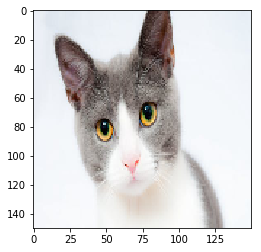

ValueError: Error when checking : expected conv2d_1_input to have shape (32, 32, 3) but got array with shape (150, 150, 3)

In [13]:
#d here is the loading and predicting part (the problem) of the code:

import keras
import tensorflow
import cv2
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.models import load_model
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K

print('keras version:' + keras.__version__)
print('tensorflow version:' + tensorflow.__version__)

model = load_model('cifar100.h5')

model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()


img_path = 'C:/Users/HP 8540W/Desktop/cat-pet-animal-domestic-104827.jpeg'   #'/Users/fchollet/Downloads/cats_and_dogs_small/test/cats/cat.1700.jpg'
from keras.preprocessing import image
import numpy as np
img = image.load_img(img_path, target_size=(150, 150))
img_tensor = image.img_to_array(img)
img_tensor = np.expand_dims(img_tensor, axis=0)
img_tensor /= 255.
#<1> Its shape is (1, 150, 150, 3)
print(img_tensor.shape)

import matplotlib.pyplot as plt
plt.imshow(img_tensor[0])
plt.show()



from keras import models
layer_outputs = [layer.output for layer in model.layers[:8]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
#im = np.array('C:/Users/HP 8540W/Desktop/cat-pet-animal-domestic-104827.jpeg')
#prediction = model.predict(im,verbose = None)
#print(prediction)



activations = activation_model.predict(img_tensor)


first_layer_activation = activations[0]
print(first_layer_activation.shape)
import matplotlib.pyplot as plt
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')

plt.matshow(first_layer_activation[0, :, :, 7], cmap='viridis')

In [18]:
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input, decode_predictions
import numpy as np
img_path = 'C:/Users/HP 8540W/Desktop/cat-pet-animal-domestic-104827.jpeg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)
x.shape

(1, 224, 224, 3)

In [17]:
preds = model.predict(x)
print('Predicted:', decode_predictions(preds, top=3)[0])

ValueError: Error when checking : expected conv2d_1_input to have shape (32, 32, 3) but got array with shape (224, 224, 3)

In [19]:
import cv2
img = cv2.imread(img_path)
heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
heatmap = np.uint8(255 * heatmap)
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = heatmap * 0.4 + img
cv2.imwrite('C:/Users/HP 8540W/Desktop/cat-pet-animal-domestic-104827.jpeg', superimposed_img)

NameError: name 'heatmap' is not defined